<a href="https://colab.research.google.com/github/CaphAlderamin/MMoPR-Lab1/blob/Lab2/MMoPR_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import time
import numpy as np
import seaborn as sns
from numpy import reshape
import pandas as pd
from sklearn . datasets import fetch_openml
from sklearn . decomposition import PCA
from sklearn . manifold import TSNE

import matplotlib . pyplot as plt
from mpl_toolkits . mplot3d import Axes3D

In [2]:
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0
y = mnist.target
print(X.shape, y.shape)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


In [3]:
feat_cols = ['pixel' + str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X, columns = feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i : str(i))
X, y = None, None
print ('Size of the dataframe : {}'.format(df.shape))

np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

Size of the dataframe : (70000, 786)


<Figure size 432x288 with 0 Axes>

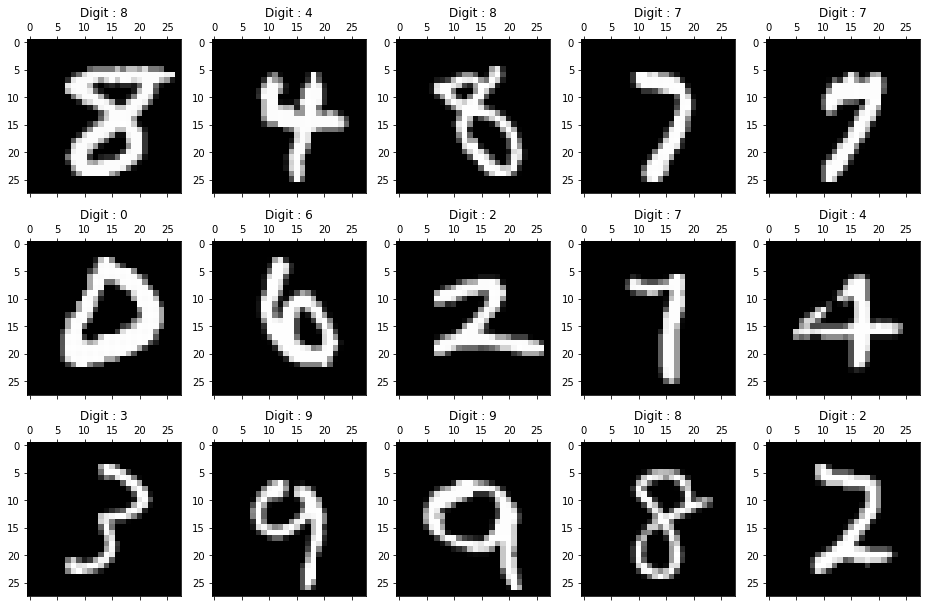

In [40]:
plt.gray()
fig = plt.figure(figsize = (16, 10.5))
for i in range(0, 15):
  ax = fig.add_subplot(3, 5, i + 1, title = "Digit : {}".format(str(df.loc[rndperm[i], 'label'])))
  ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape((28, 28)).astype(float))
plt.show()

# **PCA (Principal Component Analysis)**

In [5]:
pca = PCA(n_components = 3)
df['pixel0'] = 0
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[: ,0]
df['pca-two'] = pca_result[: ,1]
df['pca-three'] = pca_result[: ,2]
print ('Explained variation per principal component : {}'.format(pca.explained_variance_ratio_ ))

Explained variation per principal component : [0.09746116 0.07155445 0.06149531]


<AxesSubplot:xlabel='pca - one', ylabel='pca - two'>

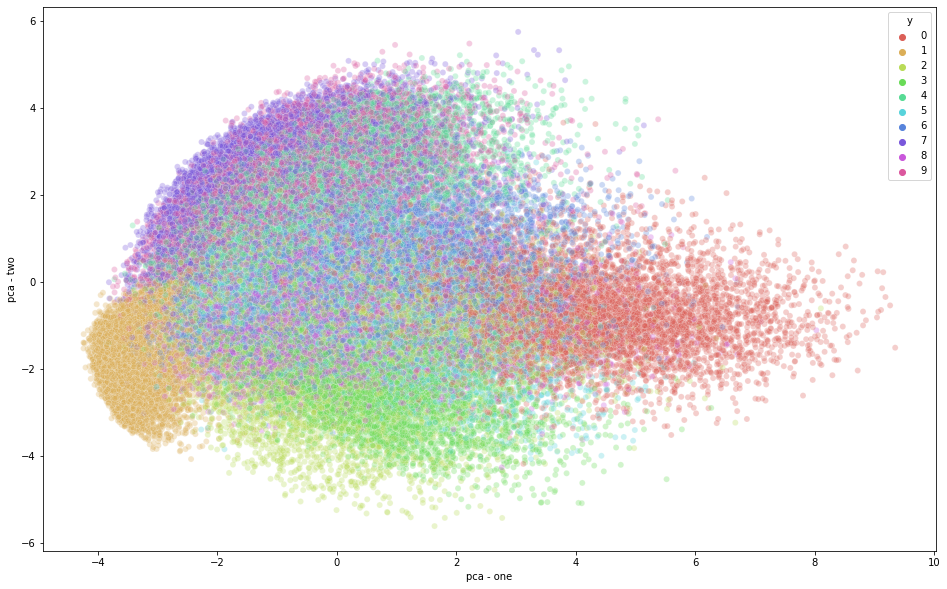

In [6]:
plt.figure(figsize = (16, 10))
sns.scatterplot(
  x = 'pca-one', 
  y = 'pca-two',
  hue = 'y',
  palette = sns.color_palette('hls', 10) ,
  data = df.loc[rndperm ,:] ,
  legend = 'full',
  alpha = 0.3
)

<ipython-input-7-018d79e9eafe>:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize = (16, 10)).gca(projection = '3d')


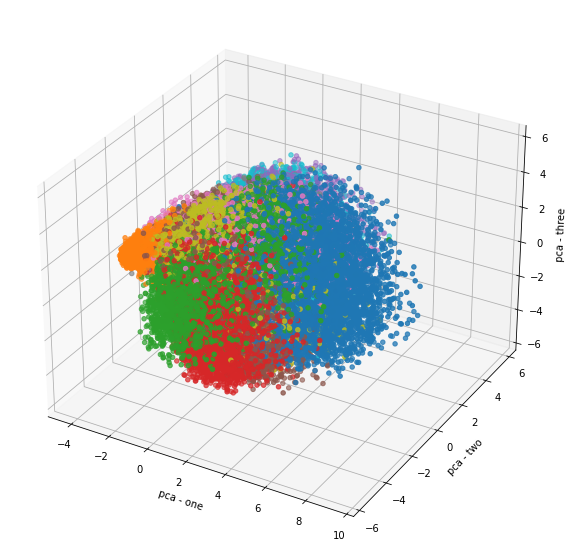

In [7]:
ax = plt.figure(figsize = (16, 10)).gca(projection = '3d')
ax.scatter(
  xs = df.loc[rndperm ,:]['pca-one'],
  ys = df.loc[rndperm ,:]['pca-two'],
  zs = df.loc[rndperm ,:]['pca-three'],
  c  = df.loc[rndperm ,:]['y'].astype(float),
  cmap = 'tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()


# **t-SNE (T-Distributed Stochastic Neighbor Embedding)**

In [8]:
N = 30000
df_subset = df.loc[rndperm[:N] ,:].copy()
data_subset = df_subset[feat_cols].values

pca = PCA(n_components = 3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[: ,0]
df_subset['pca-two'] = pca_result[: ,1]
df_subset['pca-three'] = pca_result[: ,2]
print('Explained variation per principal component : {}'.format(pca .explained_variance_ratio_))

time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done ! Time elapsed : {} seconds'.format(time.time() - time_start))

Explained variation per principal component : [0.09736827 0.07156796 0.0609305 ]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.082s...
[t-SNE] Computed neighbors for 30000 samples in 58.906s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probab

<AxesSubplot:xlabel='tsne - 2d - one', ylabel='tsne - 2d - two'>

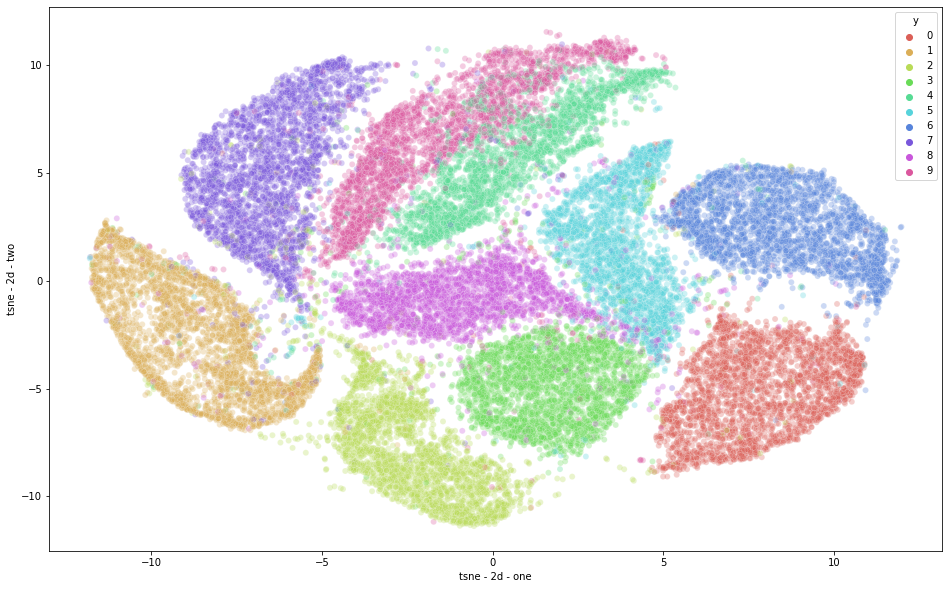

In [9]:
df_subset['tsne-2d-one'] = tsne_results[: ,0]
df_subset['tsne-2d-two'] = tsne_results[: ,1]

plt.figure(figsize = (16, 10))
sns.scatterplot (
  x = 'tsne-2d-one', 
  y = 'tsne-2d-two',
  hue = 'y',
  palette = sns.color_palette('hls', 10) ,
  data = df_subset,
  legend ='full',
  alpha = 0.3
)


<AxesSubplot:xlabel='tsne - 2d - one', ylabel='tsne - 2d - two'>

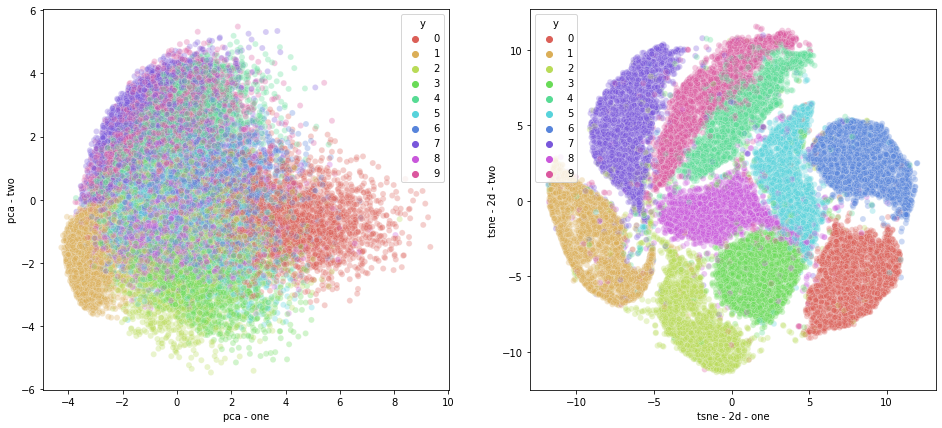

In [10]:
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
  x = 'pca-one', 
  y = 'pca-two',
  hue = 'y',
  palette = sns.color_palette('hls', 10) ,
  data = df_subset,
  legend = 'full',
  alpha = 0.3,
  ax = ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
  x = 'tsne-2d-one', 
  y = 'tsne-2d-two',
  hue = 'y',
  palette = sns.color_palette ('hls', 10),
  data = df_subset,
  legend = 'full',
  alpha = 0.3,
  ax = ax2
)